In [96]:
import pandas as pd

dataset = pd.read_csv("YRBS_rev2.csv")

In [97]:
dataset.head()

,q1,q2,q3,q4,q5_1,q5_2,q5_3,q5_4,q5_5,q6,...,q95,q96,q98,q99,BMIPCT,weight,stratum,psu,record,year
0,5,1,3,2,1,1,1,1,2,1.63,...,1,1,1,1,88.16,4.97,111,270530,5,2015
1,7,2,4,1,1,1,1,1,1,1.73,...,8,1,1,1,67.56,3.93,111,270530,7,2015
2,6,1,4,2,1,1,2,1,1,1.50,...,1,1,1,1,11.21,5.01,111,270530,9,2015
3,4,2,2,1,1,1,1,1,2,1.78,...,4,1,2,1,68.28,4.02,111,270530,13,2015
4,5,2,3,1,1,1,1,1,1,1.80,...,1,1,1,3,68.88,4.01,111,270530,15,2015


In [98]:
colq88 = dataset["q88"]
dataset.drop(labels=['q88'], axis=1, inplace = True)
dataset.insert(123, 'q88', colq88)

In [99]:
dataset.head()

,q1,q2,q3,q4,q5_1,q5_2,q5_3,q5_4,q5_5,q6,...,q96,q98,q99,BMIPCT,weight,stratum,psu,record,year,q88
0,5,1,3,2,1,1,1,1,2,1.63,...,1,1,1,88.16,4.97,111,270530,5,2015,1
1,7,2,4,1,1,1,1,1,1,1.73,...,1,1,1,67.56,3.93,111,270530,7,2015,3
2,6,1,4,2,1,1,2,1,1,1.50,...,1,1,1,11.21,5.01,111,270530,9,2015,2
3,4,2,2,1,1,1,1,1,2,1.78,...,1,2,1,68.28,4.02,111,270530,13,2015,4
4,5,2,3,1,1,1,1,1,1,1.80,...,1,1,3,68.88,4.01,111,270530,15,2015,4


In [100]:
dataset.drop(labels=['q6', 'q7','q8','q9','q10','q11', 'q12', 'q13','q14', 'q15', 'q16', 'q17',
                     'q18', 'q19', 'q21', 'q22','q29','q30', 'q32','q33','q37', 'q38','q40', 'q42','q43','q46','q47',
                     'q48','q49','q50','q51','q52','q53','q54','q55',
                     'q56','q57','q59','q62','q61','q63','q67','q69','q70','q71','q72','q73','q74','q75',
                     'q76','q81','q82','q84','q86','q87','q91','q92','q93','q94','q95','q96',
                     'q99','BMIPCT'], axis=1, inplace = True)

In [101]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15307 entries, 0 to 15306
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   q1       15307 non-null  int64  
 1   q2       15307 non-null  int64  
 2   q3       15307 non-null  int64  
 3   q4       15307 non-null  int64  
 4   q5_1     15307 non-null  int64  
 5   q5_2     15307 non-null  int64  
 6   q5_3     15307 non-null  int64  
 7   q5_4     15307 non-null  int64  
 8   q5_5     15307 non-null  int64  
 9   q23      15307 non-null  int64  
 10  q24      15307 non-null  int64  
 11  q25      15307 non-null  int64  
 12  q26      15307 non-null  int64  
 13  q27      15307 non-null  int64  
 14  q28      15307 non-null  int64  
 15  q35      15307 non-null  int64  
 16  q36_2    15307 non-null  int64  
 17  q36_3    15307 non-null  int64  
 18  q36_4    15307 non-null  int64  
 19  q36_5    15307 non-null  int64  
 20  q36_6    15307 non-null  int64  
 21  q36_7    153

In [102]:
dataset['q88'].describe()

count    15307.000000
mean         3.598942
std          1.299843
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: q88, dtype: float64

Two classes instead of 7:
    
    0 "NOT NORMAL" >>>> 1, 2, 3 and 7.
    1 "NORMAL" >>>> 4, 5 and 6.

In [103]:
dataset.loc[dataset['q88'] == 1, 'q88'] = '0'
dataset.loc[dataset['q88'] == 2, 'q88' ] = '0'
dataset.loc[dataset['q88'] == 3, 'q88'] = '0'
dataset.loc[dataset['q88'] == 4, 'q88' ] = '1'
dataset.loc[dataset['q88'] == 5, 'q88'] = '1'
dataset.loc[dataset['q88'] == 6, 'q88' ] = '1'
dataset.loc[dataset['q88'] == 7, 'q88'] = '0'
dataset['q88'].unique()

array(['0', '1'], dtype=object)

In [104]:
dataset['q88'] = dataset.q88.astype('category')

In [105]:
y = dataset["q88"]
X = dataset.drop(labels=['q88'], axis=1, inplace = True)
X = dataset

In [106]:
#time = 35.00

y.unique()

['0', '1']
Categories (2, object): ['0', '1']

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
clf_dt= tree_clf.fit(X_train, y_train)

[Text(398.15714839901216, 402.19054054054055, 'X[49] <= 5.5\ngini = 0.496\nsamples = 12245\nvalue = [5603, 6642]'),
 Text(189.22057311994723, 391.1716216216216, 'X[11] <= 1.5\ngini = 0.493\nsamples = 5914\nvalue = [3316, 2598]'),
 Text(68.06443806359445, 380.1527027027027, 'X[49] <= 2.5\ngini = 0.443\nsamples = 2318\nvalue = [1552, 766]'),
 Text(17.3208472942324, 369.13378378378377, 'X[57] <= 60150.0\ngini = 0.395\nsamples = 1003\nvalue = [731, 272]'),
 Text(1.7374376629623067, 358.11486486486484, 'X[58] <= 109.0\ngini = 0.499\nsamples = 63\nvalue = [30, 33]'),
 Text(0.8475305672986861, 347.0959459459459, 'X[58] <= 37.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.5085183403792117, 336.07702702702704, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(1.1865427942181606, 336.07702702702704, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(2.6273447586259273, 347.0959459459459, 'X[47] <= 1.5\ngini = 0.486\nsamples = 53\nvalue = [22, 31]'),
 Text(1.8645672480571096, 336.07702702

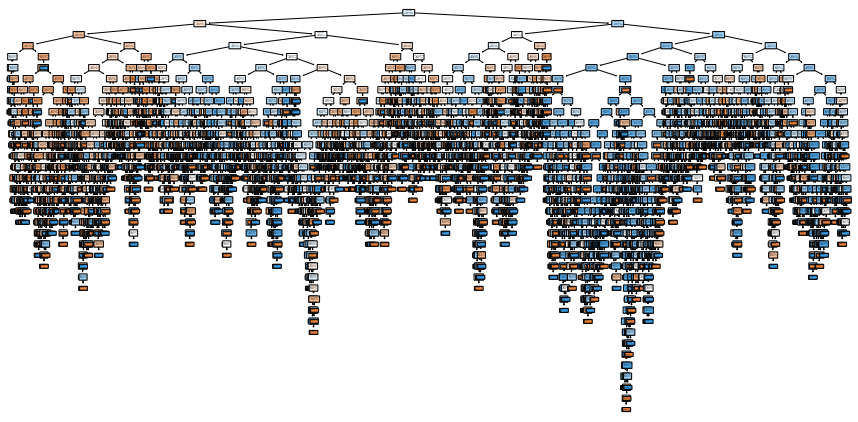

In [109]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7.5))

plot_tree(clf_dt,
         filled=True,
         rounded=True)

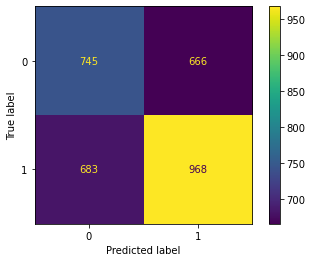

In [110]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree_clf, X_test, y_test)

Cost Complexity Pruning:

In [111]:
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas
ccp_alaphas = ccp_alphas[:-1]

clf_dts = []

In [112]:
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

Visualize Alpha:

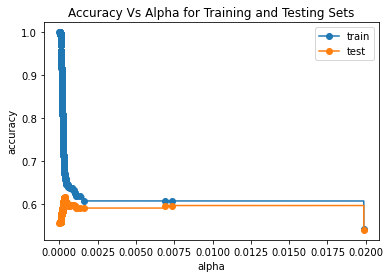

In [113]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy Vs Alpha for Training and Testing Sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<AxesSubplot:xlabel='tree'>

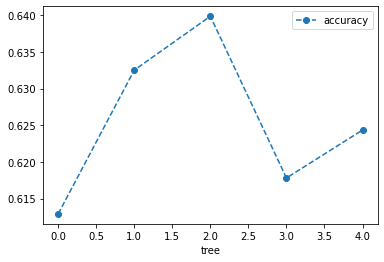

In [114]:
from sklearn.model_selection import cross_val_score

clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha= 0.0005)

scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

Cross Validation:

<AxesSubplot:xlabel='alpha'>

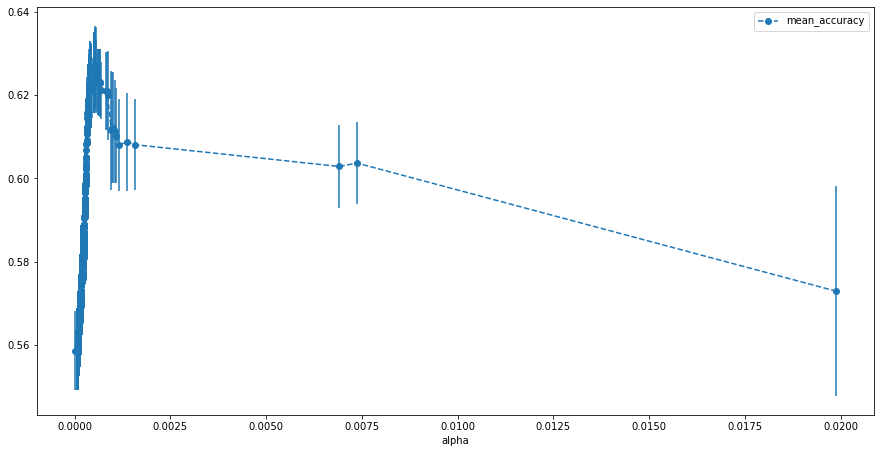

In [115]:
import numpy as np

alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                  y='mean_accuracy',
                  yerr= 'std',
                  marker='o',
                  linestyle='--',
                  figsize=(15, 7.5))

<AxesSubplot:xlabel='alpha'>

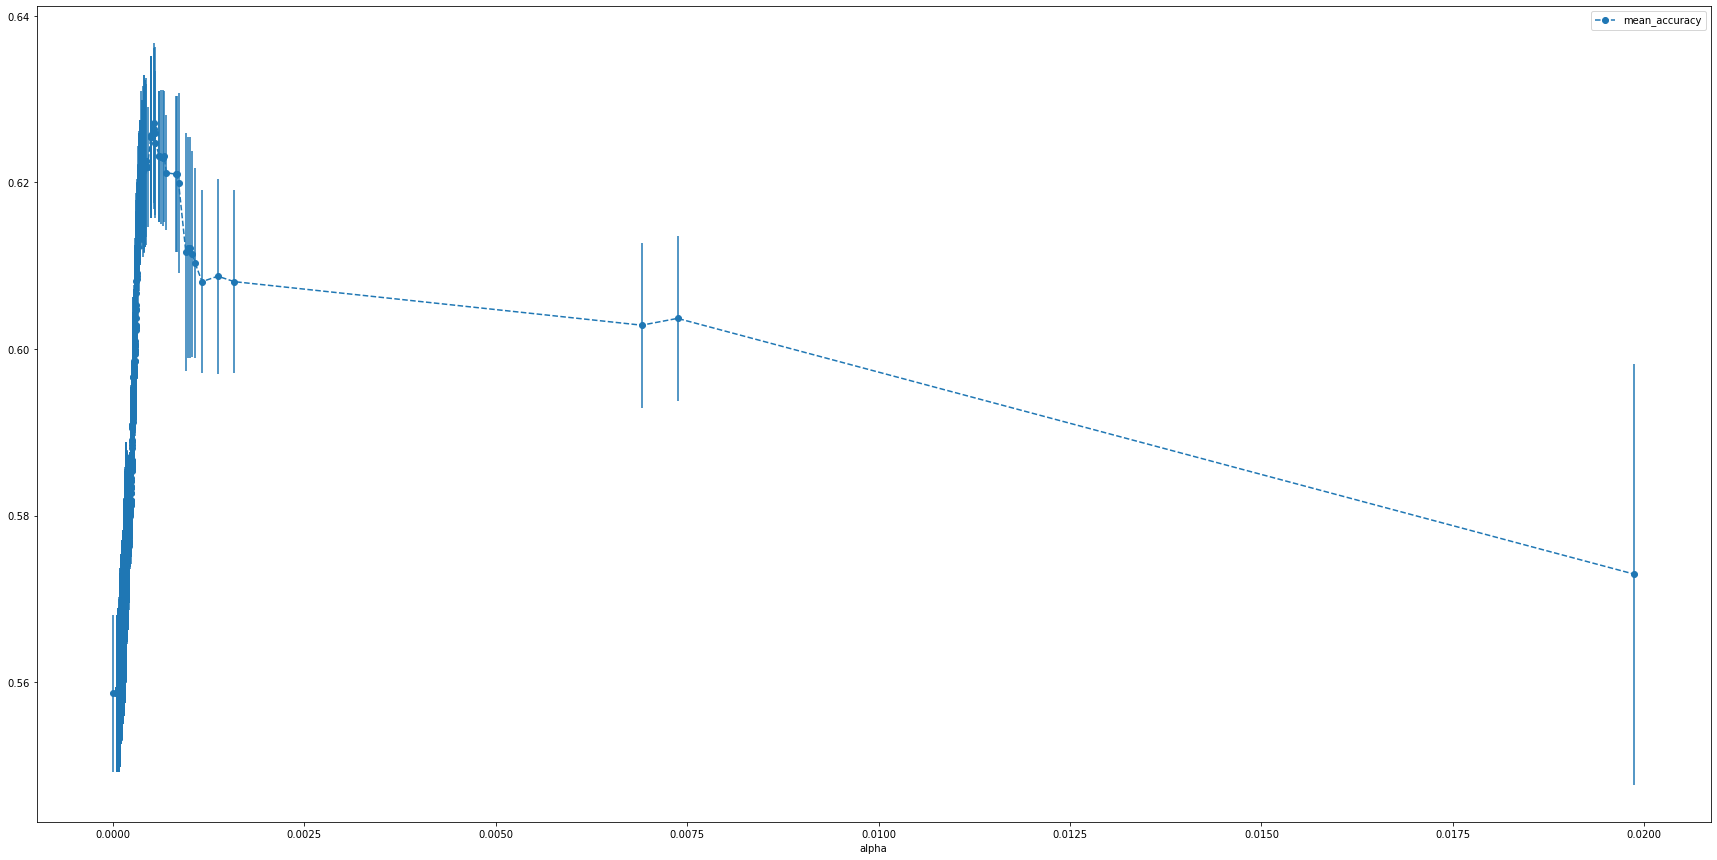

In [116]:
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                  y='mean_accuracy',
                  yerr= 'std',
                  marker='o',
                  linestyle='--',
                  figsize=(30, 15))